In [54]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [55]:
temp = pd.read_csv('Temperature bias.csv')

In [56]:
temp

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [57]:
temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [58]:
temp.dropna(inplace=True)

In [59]:
temp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [60]:
temp.shape

(7588, 25)

In [61]:
temp.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [62]:
temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [63]:
temp["day"] = pd.to_datetime(temp.Date,format='%Y-%m-%d').dt.day
temp["month"] = pd.to_datetime(temp.Date,format='%Y-%m-%d').dt.month
temp["year"] = pd.to_datetime(temp.Date,format='%Y-%m-%d').dt.year

In [64]:
temp

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [65]:
temp.drop('Date',axis=1,inplace=True)

In [66]:
temp.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
day                   int64
month                 int64
year                  int64
dtype: object

In [67]:
temp['day'].unique()

array([30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31],
      dtype=int64)

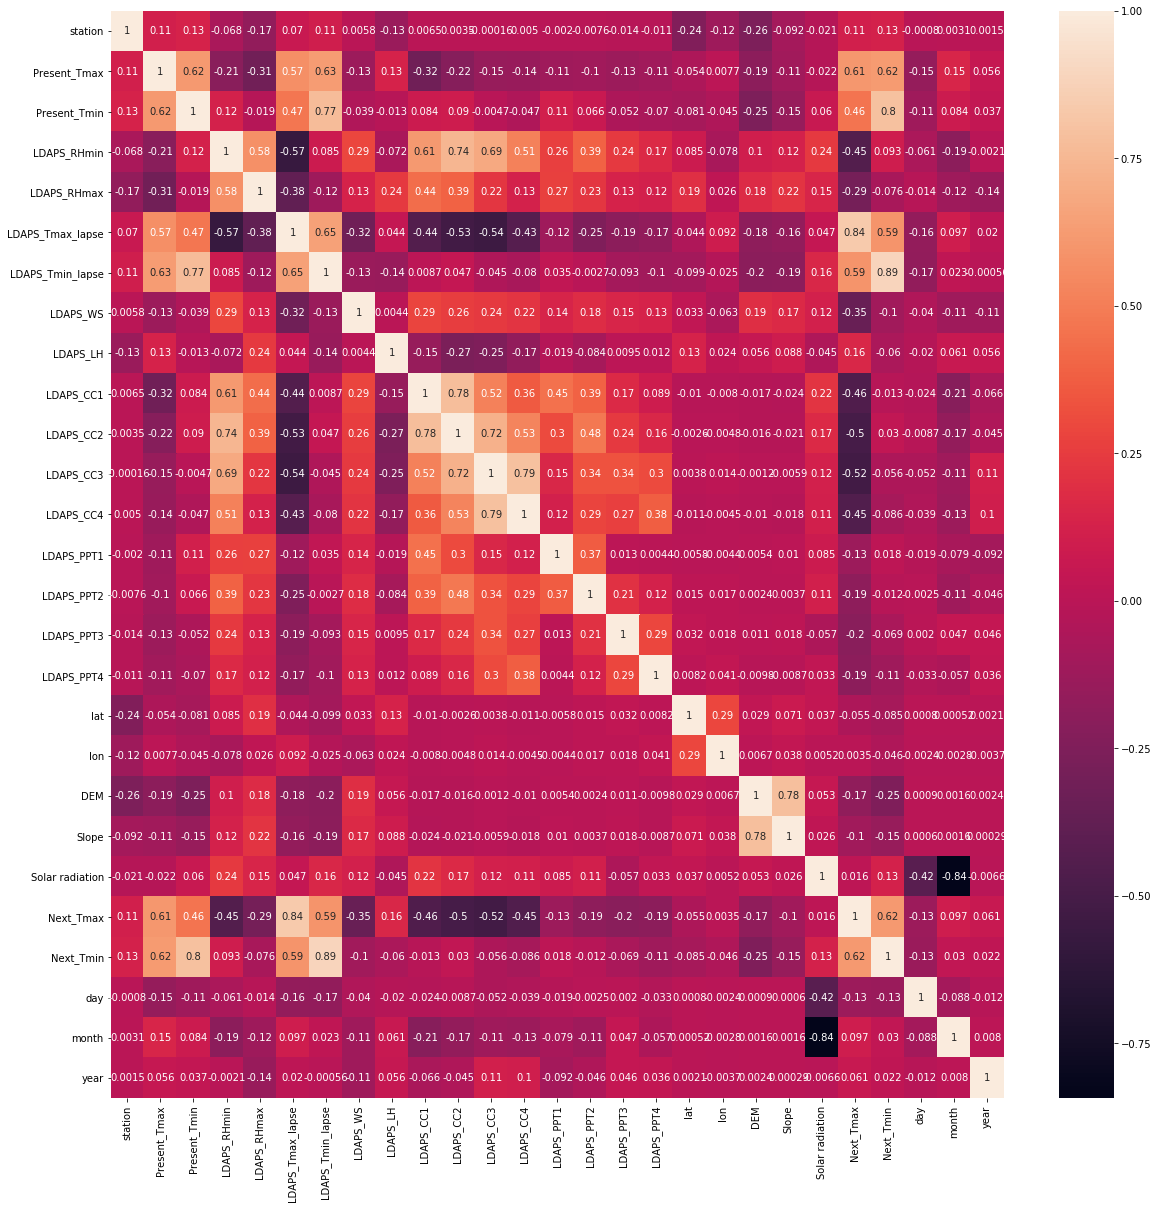

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(temp.corr(),annot=True)
plt.show()

In [69]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [70]:
temp

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [71]:
x= temp.drop(['Next_Tmin','Next_Tmax'],axis=1)
y= temp['Next_Tmax']
df_x= temp.drop(['Next_Tmin','Next_Tmax'],axis=1)

In [72]:
corr_features = correlation(x,0.85)
len(set(corr_features))

0

In [73]:
x.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
day                -0.010718
month              -0.174856
year                0.013575
dtype: float64

In [74]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,day,month,year
0,-1.857931,-0.400143,-0.785894,0.176401,0.271501,-0.556608,-0.311364,0.097802,0.318528,-0.407380,...,-0.4944,-0.447011,1.184635,-0.027876,1.833902,1.311979,1.852498,1.468769,-2.459125,-1.158037
1,-1.647078,0.709652,-0.708063,-0.237180,0.184890,0.041543,0.143619,-0.619344,-0.201095,-0.446317,...,-0.4944,-0.447011,1.184635,0.498499,0.055065,-0.387168,1.398583,1.468769,-2.459125,-1.158037
2,-1.454383,0.600750,-0.014024,-0.496590,-0.769141,0.124659,0.392812,-0.309297,-1.380242,-0.522163,...,-0.4944,-0.447011,0.653895,0.838708,-0.365481,-0.950272,1.378325,1.468769,-2.459125,-1.158037
3,-1.274154,0.746176,0.028619,0.175337,1.309753,-0.008668,-0.173951,-0.650457,0.213209,-0.488978,...,-0.4944,-0.447011,1.974001,0.368982,0.083964,1.233016,1.355226,1.468769,-2.459125,-1.158037
4,-1.103275,0.528707,-0.589813,0.035570,0.110434,-0.209847,-0.103645,-0.587672,1.292312,-0.808553,...,-0.4944,-0.447011,0.122569,1.876231,-0.291349,-0.403544,1.364282,1.468769,-2.459125,-1.158037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,1.076068,-2.067275,-2.051124,-2.612830,-1.375942,-0.642292,-1.960554,-0.023579,-1.969347,-1.355217,...,-0.4944,-0.447011,0.122569,0.602644,-0.722455,-0.281473,-1.734456,1.468769,1.019256,1.737056
7584,1.193770,-2.225156,-2.175999,-2.060276,-0.803558,-0.998728,-2.094605,-0.563635,0.660500,-1.274975,...,-0.4944,-0.447011,-0.683218,1.210750,-1.006916,-1.355268,-1.751541,1.468769,1.019256,1.737056
7585,1.310127,-2.013757,-2.267619,-2.395860,-1.319444,-1.109970,-1.824694,-0.302325,0.390795,-1.494541,...,-0.4944,-0.447011,-0.145440,-1.261421,-1.579065,-1.281031,-1.749736,1.468769,1.019256,1.737056
7586,1.425208,-2.013757,-2.082634,-2.683428,-1.462026,-0.901582,-1.837066,-0.058794,-0.352678,-1.458474,...,-0.4944,-0.447011,-0.414036,-1.044528,-1.401562,-1.073867,-1.755630,1.468769,1.019256,1.737056


In [75]:
x.skew()

station            -0.206291
Present_Tmax       -0.036516
Present_Tmin       -0.014363
LDAPS_RHmin        -0.018008
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.012155
LDAPS_Tmin_lapse   -0.021647
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.048221
LDAPS_CC2           0.047595
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.068584
lon                -0.202301
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.182349
day                -0.217762
month              -0.084425
year                0.409648
dtype: float64

In [76]:
from sklearn.metrics import r2_score
lr =LinearRegression()
def maxr2_score(regr,x,y):
    max_r_score = 0 
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_score)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [28]:
r_state= maxr2_score(lr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  43 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  44 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  45 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  46 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  47 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  48 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  49 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  50 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  51 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  52 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  53 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  54 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [31]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,20)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 19}

In [32]:
ls=Lasso(alpha=0.1)
rg = Ridge(alpha=0.1)
knr= KNeighborsRegressor(n_neighbors=19)

In [33]:
r_state= maxr2_score(ls,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  43 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  44 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  45 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  46 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  47 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  48 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  49 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  50 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  51 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  52 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  53 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  54 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to

In [34]:
r_state= maxr2_score(knr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  43 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  44 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  45 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  46 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  47 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  48 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  49 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  50 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  51 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  52 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  53 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  54 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
clft = GridSearchCV(gbr,parameters,cv=5)
clft.fit(x,y)
clft.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [36]:
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250) 
r_state= maxr2_score(gbr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  43 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  44 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  45 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  46 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  47 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  48 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  49 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  50 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  51 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  52 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  53 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  54 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to

In [37]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
ada = AdaBoostRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250],"base_estimator":[lr,ls,dt]}
fd = GridSearchCV(ada,parameters,cv=5)
fd.fit(x,y)
fd.best_params_

{'base_estimator': Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'learning_rate': 0.001,
 'n_estimators': 50}

In [78]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=50)
r_state = maxr2_score(ada,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  43 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  44 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  45 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  46 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  47 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  48 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  49 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  50 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  51 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  52 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  53 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  54 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=84 ,test_size=0.33)
ada = AdaBoostRegressor(base_estimator=dt,learning_rate=1,n_estimators=150)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [80]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score:",r2_score(y_test,y_pred))

RMSE is: 0.8199751712321085
r2 score: 0.9341381044729545


In [81]:
from sklearn.externals import joblib
joblib.dump(ada,"Max Temp.obj")

['Max Temp.obj']

In [82]:
model = joblib.load('Max Temp.obj')
model.predict(x_test)

array([34.6, 27.1, 33.2, ..., 32.2, 28.4, 31.6])

In [83]:
y= temp['Next_Tmin']

In [84]:
from sklearn.metrics import r2_score
lr =LinearRegression()
def maxr2_score(regr,x,y):
    max_r_score = 0 
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_score)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [85]:
r_state= maxr2_score(lr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  43 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  44 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  45 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  46 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  47 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  48 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  49 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  50 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  51 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  52 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  53 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  54 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [43]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,20)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 19}

In [46]:
ls=Lasso(alpha=0.01)
rg = Ridge(alpha=0.01)
knr= KNeighborsRegressor(n_neighbors=19)

In [47]:
r_state= maxr2_score(ls,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  43 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  44 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  45 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  46 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  47 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  48 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  49 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  50 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  51 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  52 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  53 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  54 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to

In [48]:
r_state= maxr2_score(rg,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  43 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  44 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  45 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  46 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  47 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  48 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  49 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  50 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  51 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  52 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  53 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  54 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to

In [49]:
r_state= maxr2_score(knr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  43 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  44 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  45 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  46 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  47 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  48 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  49 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  50 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  51 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  52 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  53 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  54 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
clft = GridSearchCV(gbr,parameters,cv=5)
clft.fit(x,y)
clft.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [50]:
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators=50) 
r_state= maxr2_score(gbr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  43 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  44 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  45 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  46 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  47 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  48 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  49 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  50 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  51 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  52 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  53 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  54 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to

In [45]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
ada = AdaBoostRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250],"base_estimator":[lr,ls,dt]}
fd = GridSearchCV(ada,parameters,cv=5)
fd.fit(x,y)
fd.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 200}

In [87]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=200)
r_state = maxr2_score(ada,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  43 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  44 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  45 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  46 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  47 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  48 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  49 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  50 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  51 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  52 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  53 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to  54 is <function r2_score at 0x0000027D1779DA68>
r2 score corresponding to

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=85 ,test_size=0.33)
ada = AdaBoostRegressor(base_estimator=dt,learning_rate=1,n_estimators=200)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [89]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score:",r2_score(y_test,y_pred))

RMSE is: 0.6696291463286036
r2 score: 0.92976675170046


In [90]:
from sklearn.externals import joblib
joblib.dump(ada,"Min Temp.obj")

['Min Temp.obj']

In [92]:
model = joblib.load('Min Temp.obj')
model.predict(x_test)

array([25.5, 23.5, 18.4, ..., 24. , 21.6, 26.7])